<a href="https://colab.research.google.com/github/Sedinei/DSWP/blob/master/NB_trabalhado/FIFA_NB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importes e configurações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Ajusta as configurações do Pandas e do Seaborn
d_configuracao = {
    'display.max_columns': 1000,
    'display.expand_frame_repr': True,
    'display.max_rows': 50,
    'display.precision': 2,
    'display.show_dimensions': True
                  }

for op, value in d_configuracao.items():
    pd.set_option(op, value)

sns.set_theme(style='dark')

## Significado da variável 'Position'
* GK = Goalkeeper – Goleiro.
* RB = Right Back – Zagueiro Direito.
* CB = Central Back – Zagueiro Central.
* LB = Left Back – Zagueiro Esquerdo.
* SW = Sweeper – Líbero.
* RWB = Right Wing Back – Lateral Direito.
* LWB = Left Wing back – Lateral Esquerdo.
* CDM = Central Defensive Midfielder – Meio Campo Defensivo / Volante.
* CM = Central Midfielder – Meia Central.
* CAM = Center Attacking Middlefielder – Meio Campo Ofensivo / Armador.
* OM = Offensive Midfielder – Meia Ofensivo.
* LOM = Left Offensive Midfielder – Meia Esquerda Ofensivo.
* ROM = Right Offensive Midfielder – Meia Direita Ofensivo.
* LM = Left Midfielder – Meia Esquerda.
* RM = Right Midfielder – Meia Direita.
* LWM = Left Wing Midfielder – Meio Ala Esquerdo.
* RWM = Right Wing Midfielder – Meio Ala Direito.
* RW = Right Winger – Ala Direito.
* LW = Left Winger – Ala Esquerto.
* LF = Left Forward – Atacante Esquerdo.
* RF = Right Forward – Atacante Direito.
* ST = Striker – Atacante.
* CF = Center Forward – Centro Avante.
* RS = Right Striker – Atacante Direito.
* LS = Left Striker – Atacante Esquerdo.

___
## 1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso);

In [48]:
url = 'https://raw.githubusercontent.com/Sedinei/DSWP/master/Dataframes/FIFA.csv'
df_fifa = pd.read_csv(url, index_col='ID')
df_fifa.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
20801,1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
190871,2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
193080,3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
192985,4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


___
## 2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?

In [6]:
df_fifa.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle'

A importância de se identificar o que pode ser iliminado é a de diminuir o espaço em memória e concentrar no que é importante. Também evita contaminações indevidas em razão de variáveis não úteis.
As colunas que não são importantes para a análise que vamos fazer são:
* Unnamed: 0 -> É apenas uma sequencia numérica de cada linha. Já temos o ID que identifica o jogador;
* Photo -> É apenas a imagem do jogador;
* Flag -> Bandeira da nacionalidade;
* Club Logo -> Imagem do logo do clube;
* Body Type -> Imagem do personagem no jogo;
* Real Face -> Indica se o personagem tem o rosto do jogador;

In [49]:
df_fifa.drop(columns=['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Body Type', 'Real Face'], inplace=True)
df_fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
     

___
## 3. Qual o dtype de cada variável/atributo do dataframe?

In [9]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     18207 non-null  object 
 7   Wage                      18207 non-null  object 
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  

___
## 4. Se alguma variável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?

Em alguns casos podemos apenas alterar o tipo. Em outros mais, vamos ter que primeiro fazer uma transformação nos dados para depois trocar o tipo.

In [11]:
# Explorando a variável 'Loaned From'
df_fifa[df_fifa['Loaned From'].notna()]['Loaned From'].head(20)

ID
198710        Real Madrid
167664           Juventus
187961       FC Barcelona
212523         SL Benfica
207410        Real Madrid
               ...       
230938           Atalanta
228941              Milan
210455    Atlético Madrid
206652         Sevilla FC
204311            Chelsea
Name: Loaned From, Length: 20, dtype: object

In [15]:
# Explorando as variáveis 'Value', 'Wage', 'Release Clause'
df_fifa[['Value', 'Wage', 'Release Clause']].sample(n=50)

,Value,Wage,Release Clause
ID,,,
246089,€50K,€1K,€93K
228759,€800K,€2K,€1.6M
229705,€1.1M,€3K,€2.1M
193896,€525K,€1K,€761K
231701,€475K,€1K,€641K
148635,€120K,€5K,€180K
172768,€5.5M,€53K,€10.5M
233161,€160K,€1K,€232K
241486,€6.5M,€12K,€16.4M


Em princípio, as variáveis 'Value', 'Wage' e 'Release Clause tem as seguintes características:
* Tem NaN
* Começa com €
* Tem sufixo K (mil) e M (milhão)
* Tem alguns valores com ponto decimal

In [37]:
# Verificando se 'Value', 'Wage', 'Release Clause' tem outro sufixo que não M ou K
import re
def M_K_suf(val):
    if pd.isna(val): return 0
    suf = re.search(r'€\d+\.?\d*([A-Z]?)', val).group(1)
    if len(suf) > 0 and suf not in ['M', 'K']: return 1
    else: return 0

In [38]:
# Testando se há algum valor em 'Value', 'Wage', 'Release Clause' com sufixo diferente de M ou K
# 0 - padrão confirmado / n - n valores fora do padrão
df_fifa[['Value', 'Wage', 'Release Clause']].applymap(M_K_suf).sum()

Value             0
Wage              0
Release Clause    0
Length: 3, dtype: int64

In [43]:
# Criando uma função para transformar 'Value', 'Wage', 'Release Clause'
def muda_valores(val):
    if pd.isna(val): return val
    info = re.search(r'€(\d+\.?\d*)([A-Z]?)', val)
    valor = float(info.group(1))
    if info.group(2) == 'M': valor *= 1000
    else: valor *= 1000000
    return valor

In [50]:
# Convertendo os valores de 'Value', 'Wage', 'Release Clause'
df_fifa[['Value', 'Wage', 'Release Clause']] = df_fifa[['Value', 'Wage', 'Release Clause']].applymap(muda_valores)
df_fifa[['Value', 'Wage', 'Release Clause']].head(10)

,Value,Wage,Release Clause
ID,,,
158023,110500.0,5.65e+08,226500.0
20801,77000.0,4.05e+08,127100.0
190871,118500.0,2.90e+08,228100.0
193080,72000.0,2.60e+08,138600.0
192985,102000.0,3.55e+08,196400.0
183277,93000.0,3.40e+08,172100.0
177003,67000.0,4.20e+08,137400.0
176580,80000.0,4.55e+08,164000.0
155862,51000.0,3.80e+08,104600.0


In [52]:
# Criando uma função para ajustar o valor das posições
def muda_pos(pos):
    if pd.isna(pos): return pos
    l_pos = pos.split('+')
    if len(l_pos) == 1: return int(pos)
    else: return int(l_pos[0]) + int(l_pos[1])

In [53]:
# Convertendo os valores das posições
df_fifa[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
         'RWB','LB','LCB','CB','RCB','RB']] = df_fifa[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM',
                                                       'LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB',
                                                       'CB','RCB','RB']].applymap(muda_pos)

In [54]:
df_fifa[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
         'RWB','LB','LCB','CB','RCB','RB']].head(20)

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
20801,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
190871,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
193080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192985,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0
183277,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0
177003,80.0,80.0,80.0,88.0,87.0,87.0,87.0,88.0,90.0,90.0,90.0,89.0,91.0,91.0,91.0,89.0,85.0,84.0,84.0,84.0,85.0,82.0,74.0,74.0,74.0,82.0
176580,92.0,92.0,92.0,91.0,92.0,92.0,92.0,91.0,90.0,90.0,90.0,89.0,84.0,84.0,84.0,89.0,74.0,73.0,73.0,73.0,74.0,71.0,68.0,68.0,68.0,71.0
155862,76.0,76.0,76.0,73.0,74.0,74.0,74.0,73.0,74.0,74.0,74.0,75.0,78.0,78.0,78.0,75.0,84.0,87.0,87.0,87.0,84.0,87.0,90.0,90.0,90.0,87.0


In [55]:
# Explorando a variável 'Height'
df_fifa['Height'].sample(50)

ID
231858    5'11
215129     5'8
237023     5'9
195687    5'11
210489    5'10
244134     5'9
140424     6'0
237889     6'1
245339     6'1
243334     6'2
222484     6'2
235236     6'1
173660     5'7
243893     6'1
236075     6'2
234171     6'0
242590    5'10
242086    5'11
233998     6'2
221350    5'10
134792    5'11
205256     6'0
239889     5'6
205343    5'11
221562     6'1
201991     6'2
229436     6'1
246256    5'11
192427     5'8
179954     6'2
235909     6'2
199963     5'8
210972    5'10
166879     6'2
241858     6'0
235212    5'11
210428     6'5
240697    5'11
178323     5'9
210536    5'10
246067     5'6
165784     5'6
207471     6'1
238941     6'1
224389     5'9
200895     6'0
207531     6'3
215414     6'2
146562     5'6
184387     6'2
Name: Height, Length: 50, dtype: object

Em princípio a variável 'Height' tem as seguintes características:
* Tem NaN
* Tem um número (pés) --> * por 30.5 cm
* Tem '
* Tem um ou dois números (polegadas) --> * 2.5 cm


In [56]:
# Verificando se tem algum valor que não segue o padrão
def ver_height(h):
    if pd.isna(h): return 0
    if re.search(r"\d+'\d+", h): return 0
    else: return 1

In [57]:
# Testando o padrão dos valores: 0 - padrão confirmado / n - n valores fora do padrão
df_fifa['Height'].map(ver_height).sum()

0

In [58]:
# Função para ajustar valores de 'Height'
def muda_height(h):
    if pd.isna(h): return h
    info = re.search(r"(\d+)'(\d+)", h)
    return (float(info.group(1)) * 30.5) + (float(info.group(2)) * 2.5)

In [59]:
# Ajusta valores de 'Height'
df_fifa['Height'] = df_fifa['Height'].map(muda_height)
df_fifa['Height']

ID
158023    170.0
20801     188.0
190871    175.0
193080    193.0
192985    180.0
          ...  
238813    175.0
243165    190.5
241638    172.5
246268    177.5
246269    177.5
Name: Height, Length: 18207, dtype: float64

In [60]:
# Explorando a variável 'Weight'
df_fifa['Weight'].sample(50)

ID
245100    190lbs
246336    159lbs
213228    141lbs
243451    176lbs
20551     170lbs
231027    137lbs
199566    152lbs
178297    161lbs
239003    170lbs
214510    150lbs
189661    176lbs
202107    170lbs
237183    159lbs
186922    168lbs
138412    154lbs
214194    165lbs
209223    150lbs
242854    143lbs
245494    157lbs
142959    174lbs
237683    154lbs
164769    168lbs
219254    194lbs
214371    154lbs
238717    174lbs
244570    194lbs
244017    198lbs
225364    146lbs
197439    181lbs
239802    154lbs
241298    163lbs
214854    152lbs
214331    168lbs
234377    152lbs
214047    157lbs
194022    176lbs
184999    172lbs
187072    176lbs
228763    185lbs
186188    183lbs
232661    163lbs
172780    154lbs
199761    181lbs
245524    130lbs
240409    170lbs
188968    174lbs
197681    170lbs
214384    176lbs
169815    181lbs
189234    165lbs
Name: Weight, Length: 50, dtype: object

Em princípio as características de 'Wheight' são as seguintes:
* Tem NaN
* Tem números seguidos de 'lbs'
* Passar para Kg --> dividir por 2.205

In [63]:
# Função para verificar se há valores em 'Weight' que não atendem o padrão
def ver_weight(w):
    if pd.isna(w): return 0
    if re.search(r'\d+lbs', w): return 0
    else: return 1

In [64]:
# Verfificando se os valores de 'Weight' estão no padrão
# 0 -> Todos os valores estão no padrão / n -> Há 'n' valores fora do padrão
df_fifa['Weight'].map(ver_weight).sum()

0

In [65]:
# Função para ajustar os valores de 'Weight'
def muda_weight(w):
    if pd.isna(w): return w
    return float(re.search(r'(\d+)lbs', w).group(1)) / 2.205

In [66]:
df_fifa['Weight'] = df_fifa['Weight'].map(muda_weight)
df_fifa['Weight'].head(20)

ID
158023    72.11
20801     82.99
190871    68.03
193080    76.19
192985    69.84
183277    73.92
177003    66.21
176580    86.17
155862    82.09
200389    87.07
188545    79.82
182521    76.19
182493    78.00
168542    67.12
215914    72.11
211110    74.83
202126    88.89
194765    73.02
192448    84.81
192119    96.15
Name: Weight, Length: 20, dtype: float64

In [72]:
# Explorando 'Joined', 'Contract Valid Until'
df_fifa[['Joined', 'Contract Valid Until']].sample(50)

,Joined,Contract Valid Until
ID,,
225756,"Jul 10, 2017",2019
172113,"Jul 19, 2017",2019
170084,"Jan 31, 2014",2021
232270,NaN,"Jun 30, 2019"
228383,"Jul 1, 2017",2022
234853,"Jul 1, 2016",2021
212428,"Aug 31, 2018",2021
222867,"Jul 14, 2017",2023
229875,"Aug 31, 2017",2019


Em princípio, 'Joined', 'Contract Valid Until' tem as seguintes características:
* Tem NaN
* Tem o ano no final
* Às vezes tem uma data começando com o mês (3 letras) e o dia (1 ou 2 números) seguido de uma vírgula
* Quando só tem o ano, é o final do ano

In [78]:
# Função para verificar se há valores de 'Joined', 'Contract Valid Until' fora do padrão
def ver_joi_contr(j_c):
    if pd.isna(j_c): return 0
    if re.search(r'[A-Z]?[a-z]{0,2}\s*\d{0,2},?\d{4}', j_c): return 0
    else: return 1

In [80]:
# Verificando se há valores fora do padrão em 'Joined', 'Contract Valid Until'
# 0 -> Todos os valores estão no padrão / n-> Há 'n' valores fora do padrão
df_fifa[['Joined', 'Contract Valid Until']].applymap(ver_joi_contr).sum()

Joined                  0
Contract Valid Until    0
Length: 2, dtype: int64

In [81]:
df_datas = df_fifa[['Joined', 'Contract Valid Until']].sample(10)
df_datas

,Joined,Contract Valid Until
ID,,
163600,"Jul 10, 2017",2020
189231,"Jun 10, 2018",2019
209750,"Jan 13, 2017",2019
188616,"Jul 1, 2007",2019
205202,"Jul 1, 2018",2020
228632,"Jul 1, 2016",2019
245224,"Nov 10, 2018",2021
236875,"Jul 1, 2018",2023
200387,"Jul 22, 2014",2019


In [89]:
# Função para incluir 'Dec 31, ' nos valores de 'Joined', 'Contract Valid Until' quando tem só o ano
def muda_joi_contr(j_c):
    if pd.isna(j_c): return j_c
    if re.search(r'[A-Z][a-z]{2}\s\d{1,2},', j_c): return j_c
    else: return 'Dec 31, ' + j_c

In [90]:
# Ajusta os valores de 'Joined', 'Contract Valid Until'
df_fifa[['Joined', 'Contract Valid Until']] = df_fifa[['Joined', 'Contract Valid Until']].applymap(muda_joi_contr)
df_fifa[['Joined', 'Contract Valid Until']].head(20)

,Joined,Contract Valid Until
ID,,
158023,"Jul 1, 2004","Dec 31, 2021"
20801,"Jul 10, 2018","Dec 31, 2022"
190871,"Aug 3, 2017","Dec 31, 2022"
193080,"Jul 1, 2011","Dec 31, 2020"
192985,"Aug 30, 2015","Dec 31, 2023"
183277,"Jul 1, 2012","Dec 31, 2020"
177003,"Aug 1, 2012","Dec 31, 2020"
176580,"Jul 11, 2014","Dec 31, 2021"
155862,"Aug 1, 2005","Dec 31, 2020"


In [94]:
# Converte o tipo de 'Joined', 'Contract Valid Until' para datetime
df_fifa['Joined'] = pd.to_datetime(df_fifa['Joined'], infer_datetime_format=True, errors='ignore')
df_fifa['Contract Valid Until'] = pd.to_datetime(df_fifa['Contract Valid Until'], infer_datetime_format=True, errors='ignore')
df_fifa[['Joined', 'Contract Valid Until']].head(20)

,Joined,Contract Valid Until
ID,,
158023,2004-07-01,2021-12-31
20801,2018-07-10,2022-12-31
190871,2017-08-03,2022-12-31
193080,2011-07-01,2020-12-31
192985,2015-08-30,2023-12-31
183277,2012-07-01,2020-12-31
177003,2012-08-01,2020-12-31
176580,2014-07-11,2021-12-31
155862,2005-08-01,2020-12-31


In [97]:
# Alterando os tipos das variáveis
tipos = {'Value': 'float64', 'Wage': 'float64', 'Height': 'float64', 'Weight': 'float64', 'LS': 'float64', 'ST': 'float64', 'RS': 'float64',
         'LW': 'float64', 'LF': 'float64', 'CF': 'float64', 'RF': 'float64', 'RW': 'float64', 'LAM': 'float64', 'CAM': 'float64',
         'RAM': 'float64', 'LM': 'float64', 'LCM': 'float64', 'CM': 'float64', 'RCM': 'float64', 'RM': 'float64', 'LWB': 'float64',
         'LDM': 'float64', 'CDM': 'float64', 'RDM': 'float64', 'RWB': 'float64', 'LB': 'float64', 'LCB': 'float64', 'CB': 'float64',
         'RCB': 'float64', 'RB': 'float64', 'Release Clause': 'float64'}
df_fifa.astype(tipos)
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 82 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Nationality               18207 non-null  object        
 3   Overall                   18207 non-null  int64         
 4   Potential                 18207 non-null  int64         
 5   Club                      17966 non-null  object        
 6   Value                     18207 non-null  float64       
 7   Wage                      18207 non-null  float64       
 8   Special                   18207 non-null  int64         
 9   Preferred Foot            18159 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Weak Foot                 18159 non-null  float64       
 12  Skill Moves 

___
## 5. Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo;

In [98]:
df_fifa.columns = [c.lower() for c in df_fifa.columns]
df_fifa.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred foot', 'international reputation',
       'weak foot', 'skill moves', 'work rate', 'position', 'jersey number',
       'joined', 'loaned from', 'contract valid until', 'height', 'weight',
       'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'crossing', 'finishing', 'headingaccuracy',
       'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy',
       'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
       'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
       'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle',
       'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
     

___
## 6. Há Missing values nos dados? Se sim, o qual sua proposta (proposta do grupo) para tratar estes Missing values?

Quase todas as variáveis tem missing values. Algumas são apenas informativas, então não trariam problemas para análises. As variáveis numéricas serão preenchidas com as médias.

In [101]:
# O código abaixo irá passar pelas colunas de tipo 'float64' para preencher os missing values com suas médias
for col in df_fifa.select_dtypes(include='float64').columns:
    media = df_fifa[col].mean()
    df_fifa[col] = df_fifa[col].fillna(value=media)
df_fifa.select_dtypes(include='float64').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 69 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   value                     18207 non-null  float64
 1   wage                      18207 non-null  float64
 2   international reputation  18207 non-null  float64
 3   weak foot                 18207 non-null  float64
 4   skill moves               18207 non-null  float64
 5   jersey number             18207 non-null  float64
 6   height                    18207 non-null  float64
 7   weight                    18207 non-null  float64
 8   ls                        18207 non-null  float64
 9   st                        18207 non-null  float64
 10  rs                        18207 non-null  float64
 11  lw                        18207 non-null  float64
 12  lf                        18207 non-null  float64
 13  cf                        18207 non-null  float64
 14  

___
## 7. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.

In [106]:
# Para as perguntas de quantidade, vou incluir uma métrica de valor 1 em cada registro chamada 'qtd'
df_fifa['qtd'] = 1

In [107]:
df_fifa[['nationality', 'qtd']].groupby(by='nationality').count()

,qtd
nationality,
Afghanistan,4
Albania,40
Algeria,60
Andorra,1
Angola,15
...,...
Uzbekistan,2
Venezuela,67
Wales,129


___
## 8. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality');

In [104]:
df_fifa[['nationality', 'age']].groupby(by='nationality').mean()

,age
nationality,
Afghanistan,22.50
Albania,24.02
Algeria,27.05
Andorra,28.00
Angola,25.87
...,...
Uzbekistan,29.50
Venezuela,24.31
Wales,24.74


___
## 9. Qual a número de jogadores por idade?

In [108]:
df_fifa[['qtd', 'age']].groupby(by='age').count()

,qtd
age,
16,42
17,289
18,732
19,1024
20,1240
21,1423
22,1340
23,1332
24,1358


___
## 10. Quantos jogadores possuem cada clube?

In [109]:
df_fifa[['club', 'qtd']].groupby(by='club').count()

,qtd
club,
SSV Jahn Regensburg,29
1. FC Heidenheim 1846,28
1. FC Kaiserslautern,26
1. FC Köln,28
1. FC Magdeburg,26
...,...
Zagłębie Sosnowiec,25
Çaykur Rizespor,30
Örebro SK,27


___
## 11. Qual a média de idade por clube?

In [110]:
df_fifa[['club', 'age']].groupby(by='club').mean()

,age
club,
SSV Jahn Regensburg,25.66
1. FC Heidenheim 1846,24.00
1. FC Kaiserslautern,23.85
1. FC Köln,24.32
1. FC Magdeburg,24.69
...,...
Zagłębie Sosnowiec,26.24
Çaykur Rizespor,25.43
Örebro SK,24.04


___
## 12. Qual a média de salário por país?

In [111]:
df_fifa[['nationality', 'wage']].groupby(by='nationality').mean()

,wage
nationality,
Afghanistan,1.25e+06
Albania,7.10e+06
Algeria,1.81e+07
Andorra,1.00e+06
Angola,7.67e+06
...,...
Uzbekistan,9.00e+06
Venezuela,6.19e+06
Wales,1.21e+07


___
## 13. Qual a média de salário por clube?

In [112]:
df_fifa[['club', 'wage']].groupby(by='club').mean()

,wage
club,
SSV Jahn Regensburg,4.24e+06
1. FC Heidenheim 1846,4.46e+06
1. FC Kaiserslautern,1.69e+06
1. FC Köln,1.33e+07
1. FC Magdeburg,4.88e+06
...,...
Zagłębie Sosnowiec,1.08e+06
Çaykur Rizespor,6.43e+06
Örebro SK,1.48e+06


___
## 14. Qual a média de salário por idade?

In [113]:
df_fifa[['age', 'wage']].groupby(by='age').mean()

,wage
age,
16,1.17e+06
17,2.14e+06
18,2.23e+06
19,2.76e+06
20,4.76e+06
21,6.17e+06
22,7.89e+06
23,8.64e+06
24,9.90e+06


___
## 15. Quanto cada clube gasta com pagamento de salários?

In [114]:
df_fifa[['club', 'wage']].groupby(by='club').sum()

,wage
club,
SSV Jahn Regensburg,1.23e+08
1. FC Heidenheim 1846,1.25e+08
1. FC Kaiserslautern,4.40e+07
1. FC Köln,3.72e+08
1. FC Magdeburg,1.27e+08
...,...
Zagłębie Sosnowiec,2.70e+07
Çaykur Rizespor,1.93e+08
Örebro SK,4.00e+07


___
## 6. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?

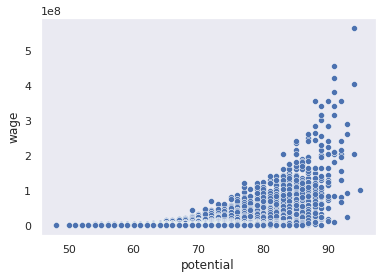

In [115]:
sns.scatterplot(data=df_fifa, x='potential', y='wage')

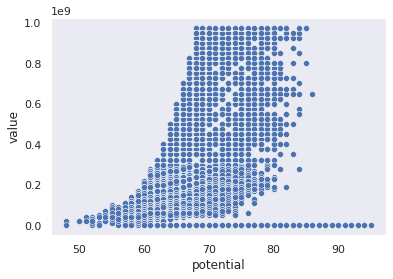

In [116]:
sns.scatterplot(data=df_fifa, x='potential', y='value')

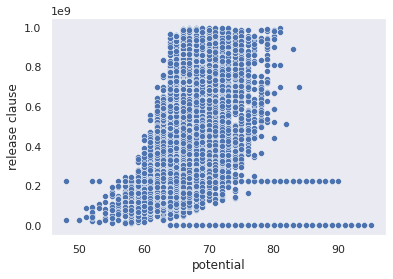

In [117]:
sns.scatterplot(data=df_fifa, x='potential', y='release clause')

Há uma tendência de o salário, o valor e a cláusula rescisória aumentar exponencialmente com o aumento do potencial do atleta.

___
## 17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?

___
## 18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?

___
## 19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.

___
## 20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?

___
## 21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?

___
## 22. Quem são os outliers em termos de salário?

___
## 23. Quem são os outliers em termos de potência no chute?

___
## 24. Qual a correlação e a interpretação entre as variáveis 'value' e as demais variáveis numéricas do dataframe?

___
## 25. Construa variáveis dummy para as colunas preferred_foot e work_rate. preferred_foot_left;